In [1]:
from dask.distributed import Client

client = Client(n_workers=4)

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
from dask import delayed
from time import sleep

In [3]:
def inc(x):
    sleep(1)
    return x + 1

# standard for-loop

In [10]:
#%%time
data = [1, 2, 3, 4, 5, 6, 7, 8]
results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)
print("After computing :", result) 

After computing : 44


# dask approach

In [18]:
#%%time
data = [1, 2, 3, 4, 5, 6, 7, 8]
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)  # After it's computed
print("time: 2 seconds")

Before computing: Delayed('sum-61619dae-df7c-439d-a923-b4e18612423a')
After computing : 44
time: 2 seconds


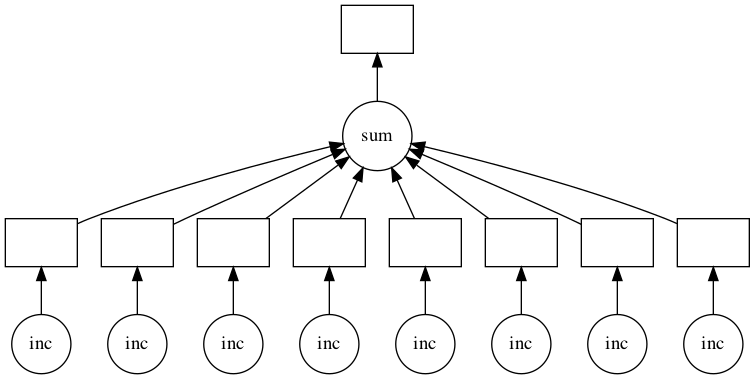

In [17]:
total.visualize()

# Dask approach with added control flow via adding conditionals to the dask task

In [19]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

In [20]:
data = [1, 2, 3, 4, 5, 6, 7, 8]
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(double)(x)
    else:          # odd
        y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)

In [21]:
%time total.compute()

CPU times: user 115 ms, sys: 18.7 ms, total: 134 ms
Wall time: 2.04 s


60

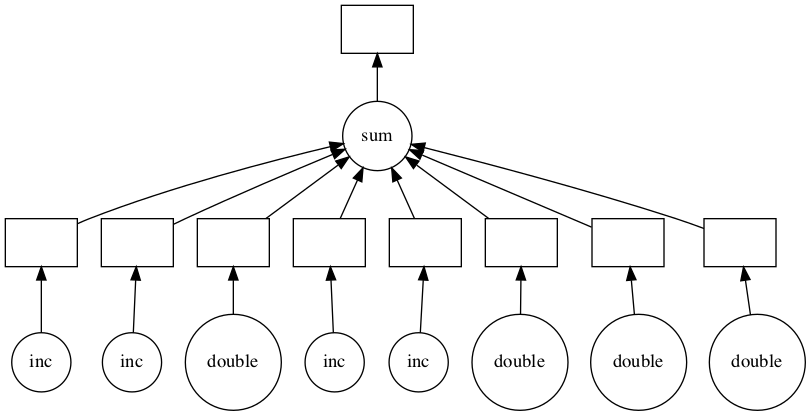

In [22]:
total.visualize()